## Rheokinetics (44 points)

In [1]:
#import packages here
import numpy as np
from matplotlib import pyplot as plt


#### In the last notebook, you got familiar with the kinetics related to the curing of thermoset polymers. This time, the focus will be on flow-related topics of such polymers. This is applicable to several manufacturing techniques you heard of in the lectures, like liquid composite moulding. This area of study is called rheology, and it plays a fundamental role in the manufacturing of polymers, serving as a crucial scientific discipline that governs the viscosity, flow and deformation behavior of polymer materials. Deep knowledge of rheology is indispensable to work in polymer composite manufacturing. This field enables control of material behavior and improved quality of produced parts.

#### As you now know, the curing of a thermoset consists of chemical reactions between individual monomers, or polymer chains and monomers, or polymer chains and other polymer chains. This phenomenon, known as cross-linking, results in a progressive increase in the molecular weight of thermosets, leading to a corresponding rise in viscosity.
#### The viscosity of a fluid is a measure of its resistance to deformation at a given rate. Viscosity can be conceptualized as quantifying the internal frictional force that arises between adjacent layers of fluid that are in relative motion.

### Question 1 (2 points)

#### As explained above, viscosity changes as the degree of cure $\alpha$ changes. Explain, on a physical and chemical level, why this occurs. Also briefly discuss why this variable is important to understand for liquid composite moulding manufacturing.

Answer: On a physical level, with increasing degree of cure, the chains of the polymer increase in length thereby restricting their movement. The effect of this is a higher viscosity with increasing degree of cure. On a chemical level, increasing degree of cure results in gelation of the resin and rapid increase in cross-linking of the polymer chains. This also results in quick increase in viscosity of the resin. 

Viscosity is an important variable to consider when it comes to LCM manufacturing. Ideally, the resin must have an appropriate viscosity to infuse throughout the part with minimum pore volume before it begins to cure.

#### Several models exists to predict the flow behaviour of thermoset materials. The Castro-Macosko model is a widely used and well-established model to simulate the changes in viscosity of thermoset materials. The model describes the viscosity as a function of temperature $T$ and degree of cure $\alpha$. Shear rate $\gamma$ will not be considered in this version of the model. The model is displayed in equation 1.

$$\eta(T, \alpha) = \eta_0(T) (\frac{\alpha_g}{\alpha_g - \alpha})^{c1+c2\alpha}$$

#### For which $\eta_0(T) = A \exp \frac{T_b}{T}$ and $T_b, c1, c2, \alpha_g$ and $A$ are material properties. 
#### The parameter $\alpha_g$ identifies the degree of cure at which gelation occurs, at which point the viscosity of material increases significantly.

The following model is given to you for the considered dicyanate: 1,1-bis(4-cyanatophenol)ethane, known as AroCy L-10, supplied by Rhone-Poulenc Inc.
$$\eta(T, \alpha) = 3.32 \cdot 10^{-8} \exp \frac{5160.39}{T} (\frac{0.64}{0.64 - \alpha})^{2.32+1.4\alpha}$$
The parameters are reported below:
$T_b = 5160.39 K$
$c_1 = 2.32$
$c_2 = 1.4$
$\alpha_g = 0.64$
$A = 3.32 \cdot 10^{-8} Pa \cdot s$

Source: Chen, Y.-T. and Macosko, C.W. (1996), Kinetics and rheology characterization during curing of dicyanates. J. Appl. Polym. Sci., 62: 567-576. https://doi-org.tudelft.idm.oclc.org/10.1002/(SICI)1097-4628(19961017)62:3<567::AID-APP14>3.0.CO;2-W

### Question 2 (3 points)

#### Question 2.1: Plot for this resin system the viscosity versus the degree of cure for several isothermal cure temperatures. Report the chosen temperatures and choose a suitable scale for the axes.

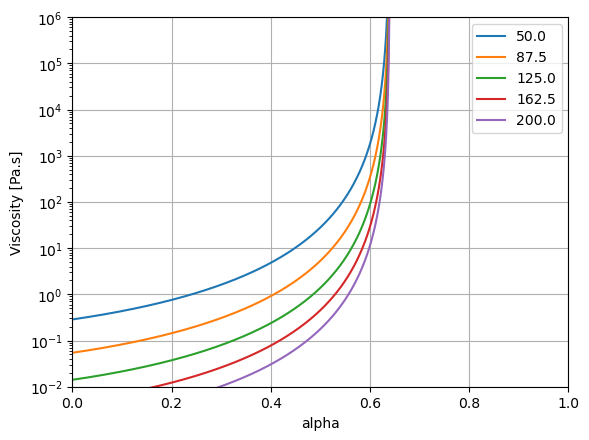

In [4]:
T0 = 273.15
def viscosity_dicyanate(T,alpha):
    return 3.32e-8 * np.exp(5160.39/(T+273.15)) * np.power(0.64/(0.64-alpha), 2.32+1.4*alpha)
T = np.linspace(50,200,5)
alpha = np.linspace(0,0.63999,1000)
for iso in T:
    plt.plot(alpha, viscosity_dicyanate(iso, alpha), label=iso)
    
#plt.plot([0.64]*1000,np.linspace(0,1000,1000), color='r')
plt.legend() 
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Viscosity [Pa.s]')
plt.yscale('log')
plt.ylim(0.01,10e5)
plt.xlim(0,1)
plt.show()

#### Question 2.2: Which information regarding the processability of this resin can be retrieved from the graph? You can include considerations that would be relevant for LCM processes such as choice of different cure temperatures and how viscosity plays a role in the process and discuss important observations made from the graph.

Answer: still need to be written. So far we chose a log scale for y axis and some temps from 50 to 200 celsius.

### Question 3 (4 points)

#### The goal of this question is to analyze the correlation between viscosity, temperature and heating rate for non-isothermal curing. In the image below, a typical viscosity vs. temperature plot is displayed for values obtained experimentally and through the Castro-Macosko model. A U-shape viscosity curve pattern can be observed when the temperature is increased. The viscosity drops at first, but ater reaching a minimum, viscosity soon increases significantly.

#### Explain the behaviour of viscosity while curing, specifically:
#### 1. What is the reason behind the initial lowering of resin viscosity?
#### 2. What information does the minimum of the curve provide?
#### 3. Why does this trend change significantly, after reaching a certain temperature?
#### 4. How does the heating rate effect the shape of the curve and why?
#### Write your answer in the textbox below the image and please provide complete and detailed explanations. You can refer to the Castro-Macosko equation as part of your answer.

![title](eta_temp.png)

Answer: 
1. The higher temperature results in higher mobility of the monomers and polymers within the resin. This means that the movmennt of the chains is easier than at lower temperature and this is visible as a decrease of viscosity. Referring to the Castro-Macosko equation, for a given degree of cure alpha, increasing the temperature will decrease the viscosity as $\eta \propto \frac{1}{T}$. 
2. answer
3. After reaching a certain temperature, rate of cross-linking between polymer chains with respect to the mobility of these chains is much higher. This sudden and rapid increase in viscosity may also suggest that it is approaching resin gelation. 

4. At lower heating rates, the resin has time to "react" to the changes in temperature and increase the length of polymer chains, reaching the minimum viscosity at a lower temperature. At higher heating rates, less cross-linking takes place in time, which allows the resin to reach a lower viscosity at a higher temperature before viscosity begins to rapidly increase again. 

#### Dynamic Mechanical Analysis, otherwise known as DMA,  is an experimental technique employed to investigate the response of materials to cyclic deformations under controlled conditions (stress, temperature, frequency, and various other parameters).

#### DMA works by applying a sinusoidal deformation to a sample of known geometry. The sample can be subjected to a controlled stress or a controlled strain. For a known stress, the sample will then deform a certain amount (or vice versa). The extent of deformation exhibited by the specimen is indicative of its stiffness.

#### DMA characterizes the material in terms of stiffness and damping, which are quantified as modulus and tangent delta (tan δ). Given the sinusoidal excitation, modulus can be further divided into in-phase (storage modulus, G') and out-of-phase (loss modulus, G'') components. The storage modulus, G', delineates the material's elastic behavior. $tan(\delta)$, calculated as the ratio of the loss modulus to the storage modulus, represents damping and serves as a measure of a material's capacity to dissipate energy.

### Question 4 (3 points)

#### The image below shows a shear-stress shear-strain relationship for various materials over time. As mentioned above, the shear-strain is applied in a sinusoidal manner. This leads to shear-stresses in various different ways. 

#### Comment on the shapes and phase-shifts of the graphs of the Hooke solid, Newton fluid, and polymer. Explain why these are exactly the results you would expect from a DMA analysis on these 3 materials.

![title](phase_shift.png)

Answer:
The shear stress and shear strain for a Hooke solid are linear related. $$ \tau = G * \gamma(t) $$ This is why applying a shear strain in a sinusoidal manner gives a sinusoidal shape to the Hooke soild graph. This also explains why at maximum applied shear strain, there is maximum shear stress. 

The shear stress and shear strain for a newtonian fluid are related in following manner: $$ \tau = \mu * \dot \gamma(t) $$ Here, $\tau$ is the shear stress, $\mu$ is the dynamic viscosity and $\dot \gamma$ is the shear rate. This also results in a sinusoidal shape for the newtonian fluid. 

Assuming that applied shear strain $\gamma(t)=\sin(t)$, shear stress for a hooke solid would have no phase shift due to their linear relation. For a newtonian fluid on the other hand, $\dot \gamma=\cos(t)$ which is equivalent to a 90 degree phase shift, $\dot \gamma=\sin(t+\frac{\pi}{2})$. Since a polymer lies between a hooke solid and a newtonian fluid, a phase shift between 0 degrees and 90 degrees is observed.


#### From tests like these, information about the storage modulus G' and loss modulus G'' can be derived. This is achieved via a known complex relationship between shear-stress and shear-strain.
$$ G* = \frac{\tau_{max}}{\gamma_{max}} = G' + iG'' $$

#### This can then be used to relate to the phase shift $\delta$ in the following manner.
$$ tan(\delta) = \frac{G''}{G'} $$

### Question 5 (2 points)

#### A spreadsheet containing DMA measurement data has been provided to you with this notebook. In this dataset, storage and loss moduli are noted for different frequencies at different temperatures. The sample is Airstone 780E, at 95% cure (only use sample #1).
#### From this data, plot two graphs showing $G'$ and $G''$ vs. temperature (for each frequency) and $tan(\delta)$ vs. temperature (for each frequency). Make sure to choose a suitable scale for the axes.

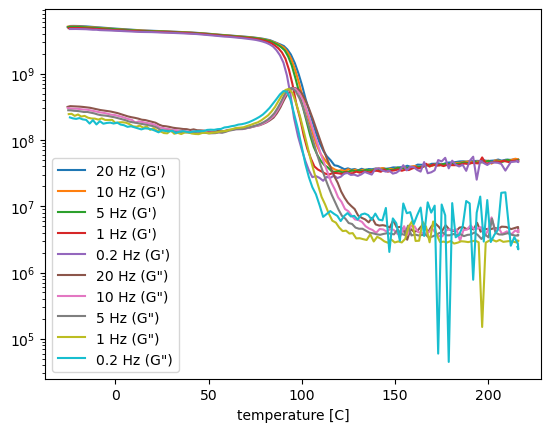

In [14]:
# Code for 1st plot here
data = np.genfromtxt('dma_data_2.csv', delimiter=',', dtype=float)  
variable = ['Freq.','Temp.',"E'(G')",'E"(G")','dL','tanD','Ft','Time']
unit = ['Hz','Cel','Pa','Pa','um','','mN','min'] 
frequencies = [20., 10., 5., 1., 0.2]
data_20, data_10, data_5, data_1, data_02 = [], [], [], [], []

i = 0
while i < len(data):
    data_20.append(data[i+0])
    data_10.append(data[i+1])
    data_5.append(data[i+2])
    data_1.append(data[i+3])
    data_02.append(data[i+4])
    i+=5
    if i == 740:
        data_20.append(data[i])
        data_10.append(data[i+1])
        data_5.append(data[i+2])
        i+=5

data_20 = np.asarray(data_20)
data_10 = np.asarray(data_10)
data_5 = np.asarray(data_5)
data_1 = np.asarray(data_1)
data_02 = np.asarray(data_02)

plt.plot(data_20[:,1],data_20[:,2], label="20 Hz (G')")
plt.plot(data_10[:,1],data_10[:,2], label="10 Hz (G')")
plt.plot(data_5[:,1],data_5[:,2], label="5 Hz (G')")
plt.plot(data_1[:,1],data_1[:,2], label="1 Hz (G')")
plt.plot(data_02[:,1],data_02[:,2], label="0.2 Hz (G')")

plt.plot(data_20[:,1],data_20[:,3], label='20 Hz (G")')
plt.plot(data_10[:,1],data_10[:,3], label='10 Hz (G")')
plt.plot(data_5[:,1],data_5[:,3], label='5 Hz (G")')
plt.plot(data_1[:,1],data_1[:,3], label='1 Hz (G")')
plt.plot(data_02[:,1],data_02[:,3], label='0.2 Hz (G")')
plt.legend()
plt.yscale('log')
plt.xlabel('temperature [C]')
plt.show()

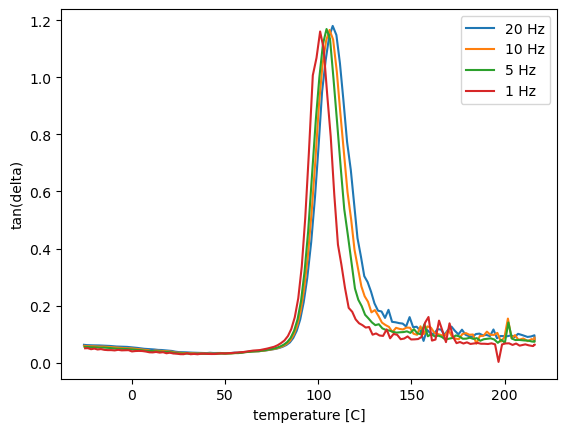

In [15]:
# Code for 2nd plot here
plt.plot(data_20[:,1],data_20[:,5], label='20 Hz')
plt.plot(data_10[:,1],data_10[:,5], label='10 Hz')
plt.plot(data_5[:,1],data_5[:,5], label='5 Hz')
plt.plot(data_1[:,1],data_1[:,5], label='1 Hz')
#plt.plot(data_02[:,1],data_02[:,5], label='0.2 Hz')
plt.legend()
plt.ylabel('tan(delta)')
plt.xlabel('temperature [C]')
plt.show()

### Question 6 (2 points)

#### Consider the plots you generated in the previous question, showing the variations of G' and G'' as functions of temperature for Airstone 780E. Now, please address the following points regarding the relationship between moduli and temperature:
#### - Explain why there is a decrease in the storage modulus G'.
#### - Elaborate on why the loss modulus G'' shows a peak
#### Please provide detailed answers below

Answer:


### Question 7 (3 points)

#### What can you derive from your results of question 5? What effect does the frequency have of storage modulus $G'$? Explain how this happens and why it is important to take this into consideration.

Answer:



### Question 8 (8 points)

#### Question 8.1: From the above-used dataset, plot storage modulus vs. temperature for every frequency. Then, find $T_g$ for each curve by using the following method: Tg can be determined from the intersection of two lines that are drawn in two regions; one in the brittle glassy state and the other in the transition region. The temperature at which these 2 lines intersect can be considered $T_g$. Report the found values of $T_g$ in the title(s). Also, demonstrate this method in the said plot: plot the intersecting lines on top of the data. If you feel it's necessary, zoom in on the points of intersect.
#### NOTE: make  an individual plot for each frequency dataset, therefore five graphs should be plotted separately

#### Question 8.2: In Question 8.1, you determined the $T_g$ for each frequency by determining the onset of the storage modulus curve. Now, find values for $T_g$ (for each frequency) using the inflection point of the storage modulus curve. The inflection point is defined as the midpoint between the onset and offset of the curve. Like you did before, plot the intersecting lines and the point of interest on top of the data.
#### NOTE: make  an individual plot for each frequency dataset, therefore five graphs should be plotted separately

### Question 9 (6 points)

#### Other methods of finding $T_g$ also exist. One of these methods works by taking the peak of the loss modulus $G''$. The corresponding temperature is then said to be $T_g$. Another method works the same as the previously mentioned method, but uses the $tan(\delta)$ function.

#### Question 9.1: For each frequency dataset create 2 figures below and apply both methods separately. Again, report the found values of $T_g$ and show a visualisation of the method.
#### NOTE: make  an individual plot for each frequency dataset, therefore ten graphs should be plotted separately

#### Question 9.2: Summarize the obtained results by generating a single graph plotting the $T_g$ at different frequencies for the following methodologies (as calculated in questions 8.1-8.2 and 9.1): meaning $tan(\delta)$, loss modulus, storage modulus (onset), storage modulus (inflection point).
#### NOTE: the output should be a single graph, showing four temperature values corresponding to the four methods, with the tested frequencies reported on the x-axis

In [ ]:
# Code for plot here

#### Now that several important aspects of viscosity of reacting polymers have been discussed, we will take a look at how this material property and other material and process parameters play a role in polymer flow. . In this case we will consider RTM. This will be done with the help of Darcy's law. The most widely used equation for describing flow through RTM molds is Darcy’s equation for flow through porous media, displayed in the equation below.
$$ Q = \frac{K_{ij}A}{\eta L} \Delta P $$

#### For which $K_{ij}$ is the permeability tensor of the preform and $L$ is the distance travelled by the resin. An average value of $K$ can be found from the Kozeny-Carman equations for resin flow in a unidirectional fibre network. For further information, please visit Chapter 4.4 ''Resin Flow'' from Processing of Polymer Matrix Composites by P.K. Mallick.


### Question 10 (7 points)

#### Question 10.1: Consider the panel in the picture below. The panel consists of a preform and still needs to be injected with epoxy resin. The fibres are T700 carbon fibres, the fibre volume content can be set to 40% (already at time of injection). The lay-up is [20%@90° / 30%@+-45° / 50%@0°] symmetric and balanced, with the 0 degree direction aligned in the length direction of the panel. The injection and mould temperatures are 120°C. The gelation time of the resin is set to 90 minutes. The viscosity of the resin can be assumed to linearly increase from 0.03 to 0.045 Pa.s over the course of 90minutes, at a temperature of 120°C.

![title](flow_fig.png)

#### It is required to perform injection at a constant flow rate. To achieve this, please determine the required pressure gradient [Bar] over time [min] and report your results in a graph. Additionally, report the undertaken steps to find a proper value of $K$ (provide sources as well).

Answer:



#### Question 10.2: First, comment on the required pressure gradients you obtained in the previous question.
#### Now, consider another infusion of the same preform. The gelation time of the resin is set to 90 minutes at 120°C.
#### If you were to optimize the manufacturing parameters for this technique, what specific modifications or improvements would you propose? Consider infusion direction, number of resin inlets, any possible steps in the process and which pressure should be applied. Propose two possible approaches and compare them.
#### Finally, compare your optimized strategies with the results obtained in question 10.1 by visualizing plots for the required pressure gradient [Bar] over time [min]. Provide your reflection about the outcomes in the cells below.

#### NOTE: If your optimized manufacturing process includes changes in infusion direction, make sure to consider proper assumptions and values for the calculated permeability of the preform.

Reflection:

Optimization strategy:

Reflection:

### Question 11 (4 points)

#### As you know, fibre volume content $V_f$ plays an important role in the permeability of a preform and therefore influences the required injection pressure. Now, assume a constant viscosity of 0.03  Pa.s and a distance of 1 meter for the resin to flow. Determine the required pressure to inject over this distance in 40 minutes, for different fibre volume fractions from 0.35 to 0.65 with steps of 0.05. Note: the laminate is the same as described in the previous question (Q10).

#### - Create a graph showing $K$ (on a logarithmic scale) vs. $V_f$ (x-axis)
#### - Next, report your results by plotting the required $\Delta P$ for infusion per fibre volume fraction $V_f$
#### - Finally, comment on your results and critically analyse the obtained values

In [ ]:
# Code for 1st plot here

In [ ]:
# Code for 2nd plot here

Comment:

### Bonus question (3 points)

#### In this notebook you focused on how DMA measurements can be used to evaluate the mechanical and physical behaviour of polymers while curing and their glass transition temperatures. In this section, DMA is used to evaluate thermal cycling effects on CFRP.

#### In the coming decades carbon fiber-reinforced polymer materials will be widely employed in manufacturing parts suitable for space applications, due to their combination of optimal mechanical properties and low density. When exposed to the space environment, operational conditions cause the composites to undergo cyclic temperature changes, between -196°C and 180°C.

#### Through experimental simulations, the effect of thermal cycles has been studied. 
#### Which chemical and physical effects of thermal cycling on composites would you expect? Focus specifically on the variations you would expect to see through DMA testing.

Answer: